# Week3 Project: Titanic - Machine Learning from Disaster


## 1. Introduction

### Project Overview
The goal is to predict whether a passenger survived or not.

I will:

Prepare and explore the data

Train more than one classification model

Compare model results

Choose the best model

### Steps
- **Load and explore** the Titanic dataset
- **Preprocess data**  handle missing values, encode categorical variables
- **Train 2 models** using scikit-learn
- **Apply cross-validation** to ensure robust performance estimates
- **Compare model scores** using appropriate metrics
- **Select the best model** and explain why it outperformed the others

## 2. Dataset Description

### About the Titanic Dataset
This dataset contains information about passengers and whether they survived or not. 


### Features

| Feature | Type | Description |
|---------|------|-------------|
| **PassengerId** | Numerical | Unique id for each person |
| **Survived** | Binary | Target variable (0 = No, 1 = Yes) |
| **Pclass** | Categorical | Ticket class (1 = first, 2 = second, 3 = third) |
| **Name** | Text | person name |
| **Sex** | Categorical | Gender |
| **Age** | Numerical | Person age |
| **SibSp** | Numerical | Ndumber of relative people |
| **Parch** | Numerical | Number of parents/children |
| **Ticket** | Text | Ticket number |
| **Fare** | Numerical | Passenger fare |
| **Cabin** | Text | Cabin number |
| **Embarked** | Categorical | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |




# 3. Exploratory Data Analysis (EDA)

In this section, look at the dataset to understand it better, check its structure, quality, and basic patterns.

### 3.1 Import Libraries
Import libraries for data manipulation, showing visualization and figures.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Read the Data
Load the data

In [2]:
# Diagnostic: Check what variables exist
import sys
print("Python version:", sys.version)
print("\nChecking variables:")
print(f"df exists: {'df' in dir()}")
print(f"X exists: {'X' in dir()}")
print(f"y exists: {'y' in dir()}")
print(f"X_train exists: {'X_train' in dir()}")
print(f"X_test exists: {'X_test' in dir()}")
print(f"y_train exists: {'y_train' in dir()}")
print(f"y_test exists: {'y_test' in dir()}")
print(f"model1_pipeline exists: {'model1_pipeline' in dir()}")

if 'X_train' in dir():
    print(f"\nX_train shape: {X_train.shape}")
if 'y_train' in dir():
    print(f"y_train shape: {y_train.shape}")


Python version: 3.11.13 (main, Aug 14 2025, 16:05:31) [Clang 20.1.4 ]

Checking variables:
df exists: False
X exists: False
y exists: False
X_train exists: False
X_test exists: False
y_train exists: False
y_test exists: False
model1_pipeline exists: False


In [3]:
df = pd.read_csv('../data/train.csv')

### 3.3 Display First Few Rows
View the first 5 rows to understand the structure and content of the dataset.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.4 Dataset Shape
Check the number of rows and columns in the dataset.


In [5]:
print(df.shape)

(891, 12)


### 3.5 Dataset Info
This shows the type of data in each column, how many values are not missing

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.6 Check Missing Values
Identify features with missing data.


In [7]:
missing_data = df.isnull().sum()

missing_data[missing_data > 0].sort_values(ascending=False)


Cabin       687
Age         177
Embarked      2
dtype: int64

### 3.7 Visualize Missing Values
Create a bar chart to visualize the amount of missing data per feature.


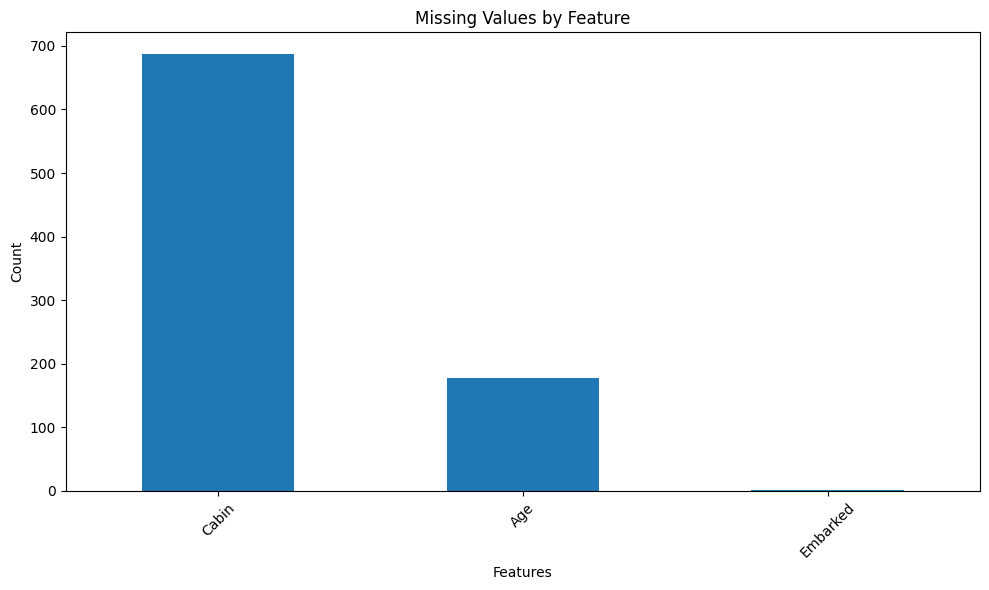

In [8]:
plt.figure(figsize=(10, 6))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Values by Feature')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.8 Target Variable counting
This shows how many passengers survived and how many did not, and calculates the percentage of passengers who survived.


In [9]:
survival_counts = df['Survived'].value_counts()
print("Survival Distribution:")
print(survival_counts)
print(f"\nSurvival Rate: {df['Survived'].mean():.2%}")


Survival Distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Survival Rate: 38.38%


### 3.9 Numerical Features Analysis
Find statistical information for numerical features


In [10]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
df[numerical_features].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


### 3.10 Visualize Numerical Distributions
This helps to see how the numbers are distributed using histograms.

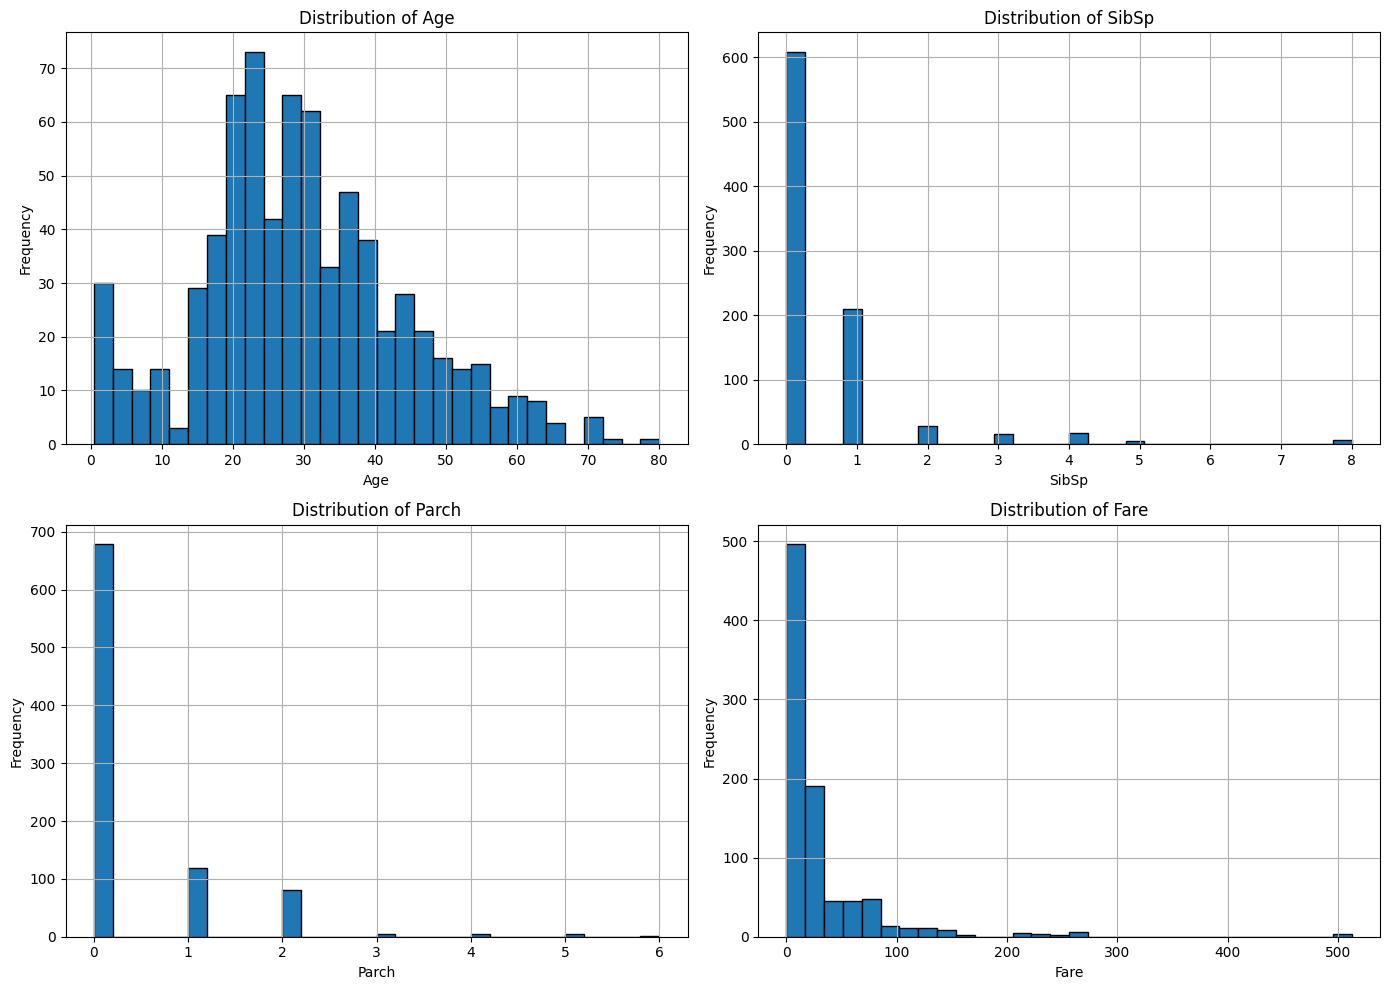

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    df[feature].hist(bins=30, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 3.11 Categorical Features Analysis
This checks the categories and how many times each one appears.

In [12]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    print(f"\n{feature} Distribution:")
    print(df[feature].value_counts())
    print(f"Unique values: {df[feature].nunique()}")



Pclass Distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Unique values: 3

Sex Distribution:
Sex
male      577
female    314
Name: count, dtype: int64
Unique values: 2

Embarked Distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Unique values: 3


### 3.12 Categorical Features vs Target
This compares survival rates for different categories to see patterns.

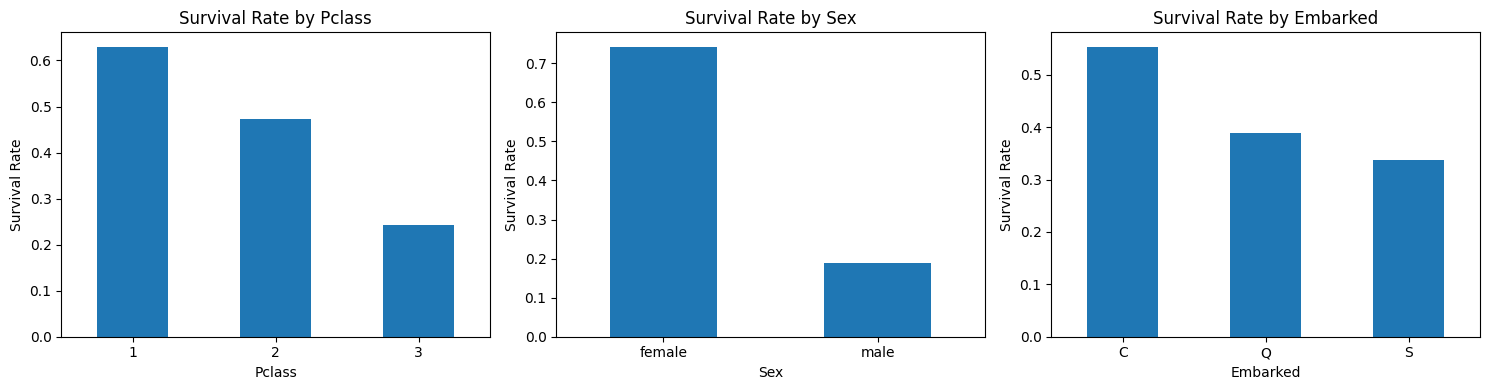

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(categorical_features):
    survival_rate = df.groupby(feature)['Survived'].mean()
    survival_rate.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Survival Rate by {feature}')
    axes[idx].set_ylabel('Survival Rate')
    axes[idx].set_xlabel(feature)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


### 3.13 EDA Summary

**Key Findings:**
- The dataset has 891 passengers and 12 columns
- Some data is missing in Age, Cabin, and Embarked
- More passengers did not survive than survived
- Women and 1st class passengers survived more
- Number columns have different value patterns


# 4. First Model: Logistic Regression

In this section, we build our first classification model using Logistic Regression 


### 4.1 Import ML Libraries
Import scikit-learn libraries


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### 4.2 Feature Selection
Select relevant features for modeling and define feature types.


In [15]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

all_features = numerical_features + categorical_features
target = 'Survived'

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
print(f"Target: {target}")


Numerical features: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Pclass', 'Sex', 'Embarked']
Target: Survived


### 4.3 remove target var from training data 
Separate features (X) and target variable (y) from the dataset.


In [16]:
X = df[all_features]
y = df[target]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (891, 7)
y shape: (891,)


### 4.4 Splitting data
Split data into training (75%) and testing (25%) sets with stratification.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 668
Testing set size: 223


### 4.5 Create Preprocessing Pipeline

In this step, we prepare the data by cleaning and transforming numerical and categorical features so they can be used by machine learning models.


In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("✓ Preprocessing pipeline created")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

✓ Preprocessing pipeline created
Numerical features: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Pclass', 'Sex', 'Embarked']


### 4.6 Build first model 
Train Logistic Regression

In [19]:
model1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

### 4.7 Cross-Validation
Perform 5 cross validation on training data to check model performance.


In [20]:
cv_scores_model1 = cross_val_score(model1_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (5-fold):")
print(cv_scores_model1)
print(f"\nMean CV Score: {cv_scores_model1.mean():.4f}")
print(f"Std CV Score: {cv_scores_model1.std():.4f}")


Cross-Validation Scores (5-fold):
[0.79850746 0.76119403 0.82835821 0.84962406 0.81203008]

Mean CV Score: 0.8099
Std CV Score: 0.0297


### 4.8 Train first model
Fit the Logistic Regression model on training data


In [21]:
model1_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

### 4.9 Evaluate first model
Evaluate model performance on test set.


In [22]:
y_pred_model1 = model1_pipeline.predict(X_test)

accuracy_model1 = accuracy_score(y_test, y_pred_model1)

print("LOGISTIC REGRESSION RESULTS")
print("Test Accuracy:", accuracy_model1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model1, target_names=['Died', 'Survived']))


LOGISTIC REGRESSION RESULTS
Test Accuracy: 0.7802690582959642

Classification Report:
              precision    recall  f1-score   support

        Died       0.81      0.85      0.83       137
    Survived       0.73      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



### 4.10 Confusion Matrix
Visualize the confusion matrix for Model 1 predictions.


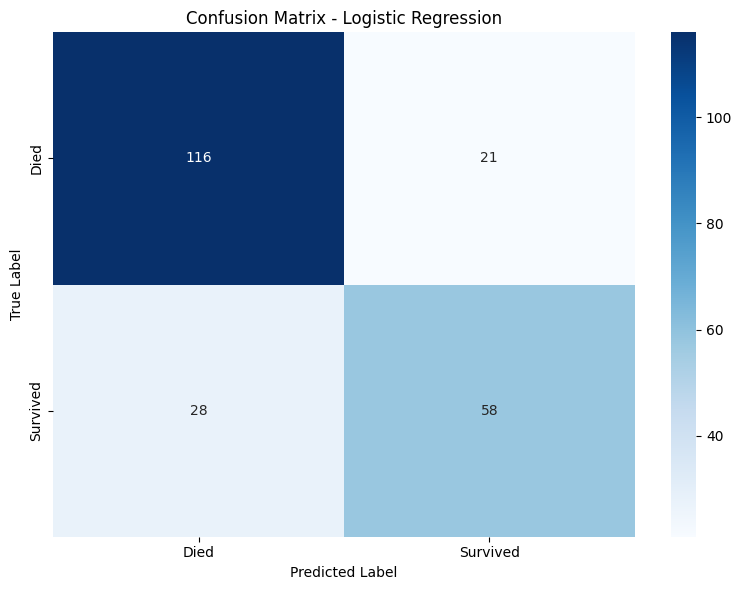

In [23]:
cm = confusion_matrix(y_test, y_pred_model1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 5. Second Model: Random Forest

In this section, we build our first classification model using Random Forest


### 5.1 Build Model 2 Pipeline
This pipeline prepares the data and trains a Random Forest model

In [24]:
model2_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

### 5.2 Cross-Validation
Perform 5 cross validation on training data for Random Forest model.


In [25]:
cv_scores_model2 = cross_val_score(model2_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (5-fold):")
print(cv_scores_model2)
print(f"\nMean CV Score: {cv_scores_model2.mean():.4f}")
print(f"Std CV Score: {cv_scores_model2.std():.4f}")


Cross-Validation Scores (5-fold):
[0.79850746 0.78358209 0.86567164 0.84210526 0.84962406]

Mean CV Score: 0.8279
Std CV Score: 0.0314


### 5.3 Train Model 2
Fit the Random Forest model on training data


In [26]:
model2_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

### 5.4 Evaluate Model 2
Make predictions and evaluate Random Forest performance on test set.


In [27]:
y_pred_model2 = model2_pipeline.predict(X_test)
accuracy_model2 = accuracy_score(y_test, y_pred_model2)

print("RANDOM FOREST RESULTS")
print("Test Accuracy:", accuracy_model2)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model2, target_names=['Died', 'Survived']))

RANDOM FOREST RESULTS
Test Accuracy: 0.7399103139013453

Classification Report:
              precision    recall  f1-score   support

        Died       0.78      0.80      0.79       137
    Survived       0.67      0.65      0.66        86

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



### 5.5 Confusion Matrix
Visualize the confusion matrix for Model 2 predictions.


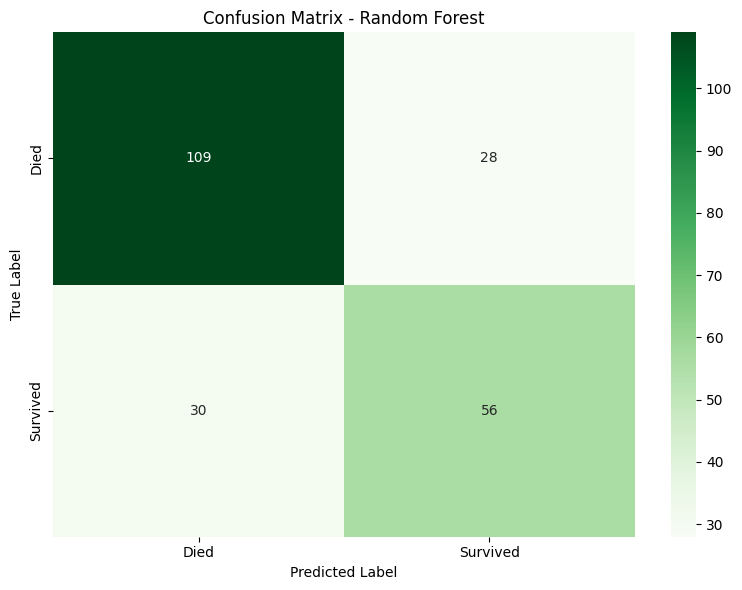

In [28]:
cm_model2 = confusion_matrix(y_test, y_pred_model2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model2, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


# 6.  Pick a winning model 

In this section, we compare both models' performance and select the winning model with justification.


### 6.1 Compile Model Results
show the performance and score for each model

In [33]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'CV Mean Score': [cv_scores_model1.mean(), cv_scores_model2.mean()],
    'Test Accuracy': [accuracy_model1, accuracy_model2]
})

print("Model comparsion")
print(results_df)


Model comparsion
                 Model  CV Mean Score  Test Accuracy
0  Logistic Regression       0.809943       0.780269
1        Random Forest       0.827898       0.739910


### 6.2 Visualize Model Comparison
Create bar charts to compare model performance


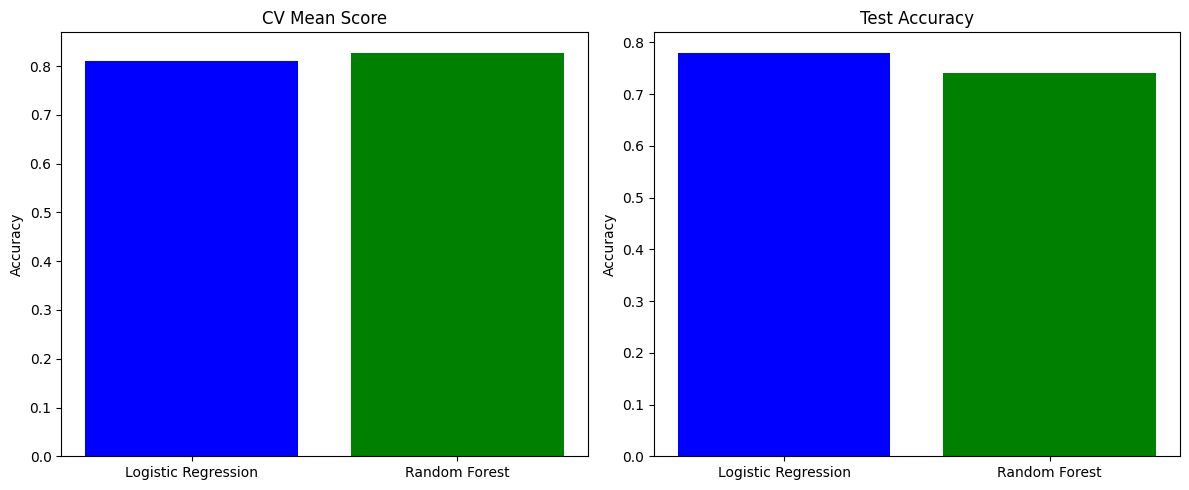

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(results_df['Model'], results_df['CV Mean Score'], color=['blue', 'green'])
axes[0].set_title('CV Mean Score')
axes[0].set_ylabel('Accuracy')

axes[1].bar(results_df['Model'], results_df['Test Accuracy'], color=['blue', 'green'])
axes[1].set_title('Test Accuracy')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


### 6.4 Select Winning Model
Determine the best performing model based on test accuracy and cross-validation scores.


In [35]:
print("Winning Model")
print("Best Model:", best_model_name)
print("Test Accuracy:", best_accuracy)
print("CV Mean Score:", results_df.loc[best_model_idx, 'CV Mean Score'])


Winning Model
Best Model: Logistic Regression
Test Accuracy: 0.7802690582959642
CV Mean Score: 0.8099427673661765


### 6.5 Why Logistic regression won?

**Explanation of Model Performance:**  

1. **Test Accuracy**: Logistic Regression was more correct on the test data.  
2. **CV Scores**: Its cross-validation scores were stable and reliable.  

**Why logistic regression outperformed random forest:**  

**Logistic Regression (Winner):**  
- Works well because the data relationships are mostly **linear**.  
- Fewer parameters, so less chance of overfitting.  

**Random Forest:**  
- Can find **complex patterns** in the data.  
- Handles **interactions between features** automatically.  


